In this notebook we will see how to learn mutiple BNs from multiple datasets where we
will put a bias on the BNs to be similar. First we need a few datasets. The easiest way to this is to grab a dataset and then sample from it:

In [1]:
from pygobnilp.gobnilp import Gobnilp
m = Gobnilp()
m.learn('discrete.dat',end='data') #stop the process as soon as we have the data
datas = []
import numpy as np
np.random.seed(12) #so we get the same results each time
for i in range(4):
    idx = np.random.randint(0, len(m.rawdata), size=1000) # sampling with replacement
    datas.append(m.rawdata[idx,:])

Using license file /home/james/gurobi.lic
Academic license - for non-commercial use only


OK, so now we have 4 numpy arrays of data each with 1000 rows and 6 columns. Now we can learn a BN for each of these data sets.

**********
BN has score -4936.315210426101
**********
X_0_0<-X_0_1 -895.5326411739161
X_0_1<-X_0_4 -812.7914317219329
X_0_4<-X_0_5 -1018.1456089120893
X_0_2<- -719.4330747791437
X_0_3<-X_0_0,X_0_2 -793.9233922658718
X_0_5<- -696.4890615731474
**********
bnlearn modelstring = 
[X_0_0|X_0_1][X_0_1|X_0_4][X_0_4|X_0_5][X_0_2][X_0_3|X_0_0:X_0_2][X_0_5]
**********
CPDAG:
Vertices: X_0_0,X_0_1,X_0_4,X_0_2,X_0_3,X_0_5
X_0_0->X_0_3
X_0_1-X_0_0
X_0_4-X_0_1
X_0_2->X_0_3
X_0_5-X_0_4



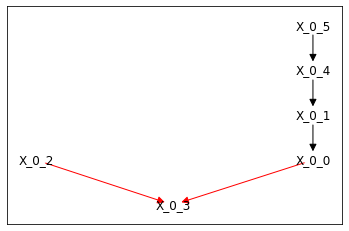

**********
BN has score -4869.748020768999
**********
X_1_0<- -1102.9867239070936
X_1_1<-X_1_0 -729.3015978015064
X_1_2<- -674.8893146520195
X_1_3<-X_1_0,X_1_2 -758.296713656011
X_1_4<-X_1_1,X_1_5 -907.4545712189961
X_1_5<- -696.8190995333725
**********
bnlearn modelstring = 
[X_1_0][X_1_1|X_1_0][X_1_2][X_1_3|X_1_0:X_1_2][X_1_4|X_1_1:X_1_5][X_1_5]
**********
CPDAG:
Vertices: X_1_0,X_1_1,X_1_2,X_1_3,X_1_4,X_1_5
X_1_0-X_1_1
X_1_0->X_1_3
X_1_1->X_1_4
X_1_2->X_1_3
X_1_5->X_1_4



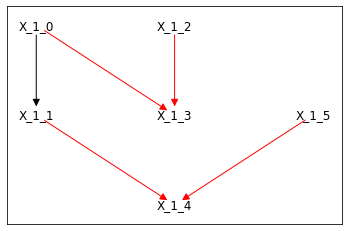

**********
BN has score -4951.113028658169
**********
X_2_0<- -1105.0242013394845
X_2_1<-X_2_0 -788.2802839089154
X_2_2<- -711.8062450261032
X_2_3<-X_2_0,X_2_2 -733.2403044324537
X_2_4<-X_2_1,X_2_5 -918.5291376754126
X_2_5<- -694.2328562758003
**********
bnlearn modelstring = 
[X_2_0][X_2_1|X_2_0][X_2_2][X_2_3|X_2_2:X_2_0][X_2_4|X_2_5:X_2_1][X_2_5]
**********
CPDAG:
Vertices: X_2_0,X_2_1,X_2_2,X_2_3,X_2_4,X_2_5
X_2_0-X_2_1
X_2_0->X_2_3
X_2_1->X_2_4
X_2_2->X_2_3
X_2_5->X_2_4



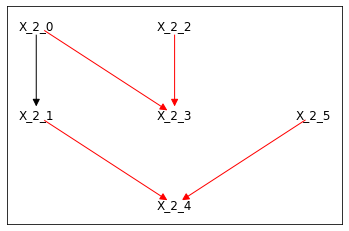

**********
BN has score -5077.166409760277
**********
X_3_0<-X_3_2,X_3_3 -828.2028500503448
X_3_2<- -735.8306995983112
X_3_3<- -1104.1246653983944
X_3_1<-X_3_0 -767.7050890773539
X_3_4<-X_3_1 -1021.3850588092846
X_3_5<-X_3_4 -619.9180468265877
**********
bnlearn modelstring = 
[X_3_0|X_3_2:X_3_3][X_3_2][X_3_3][X_3_1|X_3_0][X_3_4|X_3_1][X_3_5|X_3_4]
**********
CPDAG:
Vertices: X_3_0,X_3_2,X_3_3,X_3_1,X_3_4,X_3_5
X_3_0->X_3_1
X_3_2->X_3_0
X_3_3->X_3_0
X_3_1->X_3_4
X_3_4->X_3_5



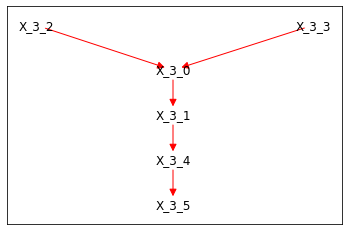

In [2]:
ms = []
for i in range(4):
    ms.append(Gobnilp())
    ms[i].learn(datas[i],varnames=['X_{0}_{1}'.format(i,j) for j in range(6)],
                pruning=False, # keep all parent sets for later
                abbrev=False) # want to see full variable names on plots

OK, so we have learned 4 BNs from 4 datasets. Now suppose we want to impose a preference that the 4 BNs be similar. To do this all MIP variables from the 4 separate problems need to be in the same MIP instance. We can do this by creating a new model which takes the union of the 4 sets of local scores as input. First off, we do this and then just learn a BN from this input without any preference for the BNs to be similar. (Note that this size of the plotted figure is made bigger so that we can see it well.)

**********
BN has score -19834.342669613547
**********
X_0_0<-X_0_1 -895.5326411739161
X_0_1<- -958.3892502988647
X_0_2<- -719.4330747791437
X_0_3<-X_0_0,X_0_2 -793.9233922658718
X_0_4<-X_0_1 -950.8630984592373
X_0_5<-X_0_4 -618.1737534490676
X_1_0<- -1102.9867239070936
X_1_1<-X_1_0 -729.3015978015064
X_1_2<- -674.8893146520195
X_1_3<-X_1_0,X_1_2 -758.296713656011
X_1_4<-X_1_1,X_1_5 -907.4545712189961
X_1_5<- -696.8190995333725
X_2_0<- -1105.0242013394845
X_2_1<-X_2_0 -788.2802839089154
X_2_2<- -711.8062450261032
X_2_3<-X_2_0,X_2_2 -733.2403044324537
X_2_4<-X_2_1,X_2_5 -918.5291376754126
X_2_5<- -694.2328562758003
X_3_0<-X_3_2,X_3_3 -828.2028500503448
X_3_2<- -735.8306995983112
X_3_3<- -1104.1246653983944
X_3_1<-X_3_0 -767.7050890773539
X_3_4<-X_3_1 -1021.3850588092846
X_3_5<-X_3_4 -619.9180468265877
**********
bnlearn modelstring = 
[X_0_0|X_0_1][X_0_1][X_0_2][X_0_3|X_0_0:X_0_2][X_0_4|X_0_1][X_0_5|X_0_4][X_1_0][X_1_1|X_1_0][X_1_2][X_1_3|X_1_0:X_1_2][X_1_4|X_1_1:X_1_5][X_1_5][X_2_0][X_

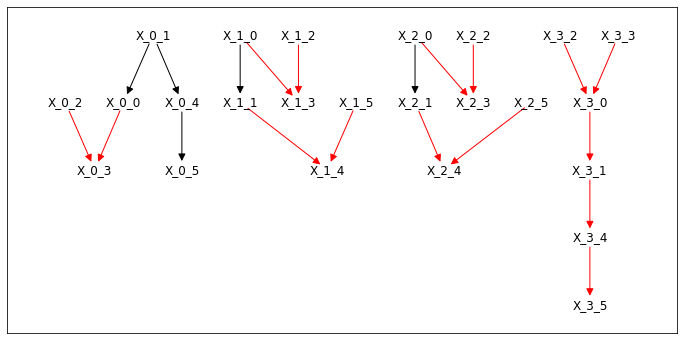

In [3]:
global_local_scores = {}
for i in range(4):
    global_local_scores.update(ms[i].local_scores)
m = Gobnilp()
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6] #increase size of figure (since plot not interactive)
m.learn(local_scores_source=global_local_scores,abbrev=False)

Before expressing a *preference* for the 4 BNs to be similar, let's do something easier: put in a hard constraint that each of the 4 BNs are exactly the same. We can do this most easily by requiring that the arrow variables for each learned BN are the same.

**********
BN has score -19835.376476073172
**********
X_0_0<-X_0_1 -895.5326411739161
X_0_1<- -958.3892502988647
X_0_2<- -719.4330747791437
X_0_3<-X_0_0,X_0_2 -793.9233922658718
X_0_4<-X_0_1,X_0_5 -873.1544539394586
X_0_5<- -696.4890615731474
X_1_0<-X_1_1 -879.9605303708295
X_1_1<- -952.3277913377706
X_1_2<- -674.8893146520195
X_1_3<-X_1_0,X_1_2 -758.296713656011
X_1_4<-X_1_1,X_1_5 -907.4545712189961
X_1_5<- -696.8190995333725
X_2_0<-X_2_1 -907.6347422284807
X_2_1<- -985.6697430199192
X_2_2<- -711.8062450261032
X_2_3<-X_2_0,X_2_2 -733.2403044324537
X_2_4<-X_2_1,X_2_5 -918.5291376754126
X_2_5<- -694.2328562758003
X_3_0<-X_3_1 -886.2816127837227
X_3_1<- -986.8187936073391
X_3_2<- -735.8306995983112
X_3_3<-X_3_0,X_3_2 -827.125460443463
X_3_4<-X_3_1,X_3_5 -944.7118866313931
X_3_5<- -696.8250995513717
**********
bnlearn modelstring = 
[X_0_0|X_0_1][X_0_1][X_0_2][X_0_3|X_0_0:X_0_2][X_0_4|X_0_1:X_0_5][X_0_5][X_1_0|X_1_1][X_1_1][X_1_2][X_1_3|X_1_0:X_1_2][X_1_4|X_1_1:X_1_5][X_1_5][X_2_0|X_2_1]

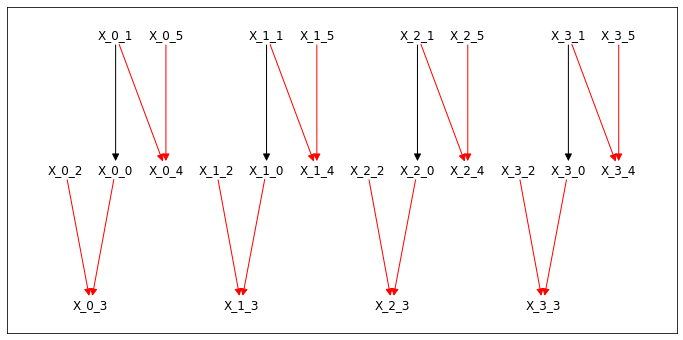

In [4]:
def namei(u,i):
    'get corresponding name for BN i'
    return u[:2]+str(i)+u[3:]

hard_conss = []
for (u,v) in ms[0].arrow:
    mipvar = m.arrow[u,v]
    for i in range(1,4):
        hard_conss.append(m.addConstr(mipvar == m.arrow[namei(u,i),namei(v,i)]))
m.learn(start='MIP model',abbrev=False)

OK, sure enough we get 4 identical Bayesian networks. Now let's just put a bias towards similarity. To do this we will create, for each pair of arrow variables in distinct BNs, a binary variable which takes the value 1 if the two arrow variables have different values.

**********
BN has score -19835.335931921978
**********
X_0_0<-X_0_1 -895.5326411739161
X_0_1<-X_0_4 -812.7914317219329
X_0_4<-X_0_5 -1018.1456089120893
X_0_2<- -719.4330747791437
X_0_3<-X_0_0,X_0_2 -793.9233922658718
X_0_5<- -696.4890615731474
X_1_0<-X_1_1 -879.9605303708295
X_1_1<- -952.3277913377706
X_1_2<- -674.8893146520195
X_1_3<-X_1_0,X_1_2 -758.296713656011
X_1_4<-X_1_1,X_1_5 -907.4545712189961
X_1_5<- -696.8190995333725
X_2_0<-X_2_1 -907.6347422284807
X_2_1<- -985.6697430199192
X_2_2<- -711.8062450261032
X_2_3<-X_2_0,X_2_2 -733.2403044324537
X_2_4<-X_2_1,X_2_5 -918.5291376754126
X_2_5<- -694.2328562758003
X_3_0<-X_3_1 -886.2816127837227
X_3_1<-X_3_4 -902.9689659263204
X_3_4<-X_3_5 -1028.3278337655192
X_3_2<- -735.8306995983112
X_3_3<-X_3_0,X_3_2 -827.125460443463
X_3_5<- -696.8250995513717
**********
bnlearn modelstring = 
[X_0_0|X_0_1][X_0_1|X_0_4][X_0_4|X_0_5][X_0_2][X_0_3|X_0_0:X_0_2][X_0_5][X_1_0|X_1_1][X_1_1][X_1_2][X_1_3|X_1_0:X_1_2][X_1_4|X_1_1:X_1_5][X_1_5][X_2_0|X_2_1]

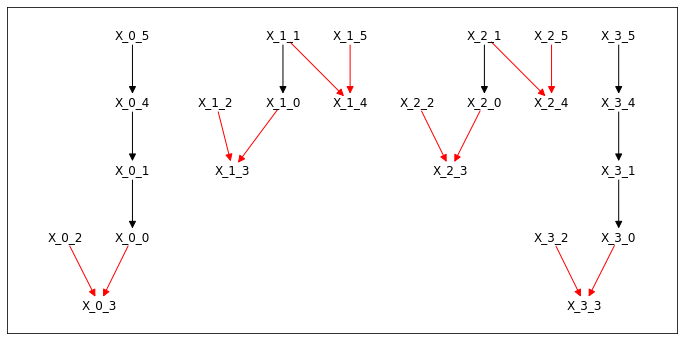

In [5]:
from gurobipy import GRB

def xorvar(m,x,y,obj=0.0):
    'return binary variable which is x xor y'
    r = m.addVar(obj=obj,vtype=GRB.BINARY)
    #convex hull method from Achterberg's thesis (14.29)
    m.addConstr( r - x - y <= 0) # disallow r=1,x=0,y=0
    m.addConstr(-r + x - y <= 0) # disallow r=0,x=1,y=0
    m.addConstr(-r - x + y <= 0) # disallow r=0,x=0,y=1
    m.addConstr( r + x + y <= 2) # disallow r=1,x=1,y=1
    return r

# get rid of hard constraints
m.remove(hard_conss)

# add in soft constraints
xors = []
for i in range(4):
    for j in range(i+1,4):
        for (u,v) in ms[0].arrow:
            arrowi = m.arrow[namei(u,i),namei(v,i)]
            arrowj = m.arrow[namei(u,j),namei(v,j)]
            xors.append(xorvar(m,arrowi,arrowj,-0.1))

m.learn(start='MIP model',abbrev=False)

So with only a 0.1 penalty for pairs of nodes in different BNs to be connected differently, we can still get not all BNs to be the same. Let's increase this penalty to 1 and see what happens. 

**********
BN has score -19835.376476073172
**********
X_0_0<-X_0_1 -895.5326411739161
X_0_1<- -958.3892502988647
X_0_2<- -719.4330747791437
X_0_3<-X_0_0,X_0_2 -793.9233922658718
X_0_4<-X_0_1,X_0_5 -873.1544539394586
X_0_5<- -696.4890615731474
X_1_0<-X_1_1 -879.9605303708295
X_1_1<- -952.3277913377706
X_1_2<- -674.8893146520195
X_1_3<-X_1_0,X_1_2 -758.296713656011
X_1_4<-X_1_1,X_1_5 -907.4545712189961
X_1_5<- -696.8190995333725
X_2_0<-X_2_1 -907.6347422284807
X_2_1<- -985.6697430199192
X_2_2<- -711.8062450261032
X_2_3<-X_2_0,X_2_2 -733.2403044324537
X_2_4<-X_2_1,X_2_5 -918.5291376754126
X_2_5<- -694.2328562758003
X_3_0<-X_3_1 -886.2816127837227
X_3_1<- -986.8187936073391
X_3_2<- -735.8306995983112
X_3_3<-X_3_0,X_3_2 -827.125460443463
X_3_4<-X_3_1,X_3_5 -944.7118866313931
X_3_5<- -696.8250995513717
**********
bnlearn modelstring = 
[X_0_0|X_0_1][X_0_1][X_0_2][X_0_3|X_0_0:X_0_2][X_0_4|X_0_1:X_0_5][X_0_5][X_1_0|X_1_1][X_1_1][X_1_2][X_1_3|X_1_0:X_1_2][X_1_4|X_1_1:X_1_5][X_1_5][X_2_0|X_2_1]

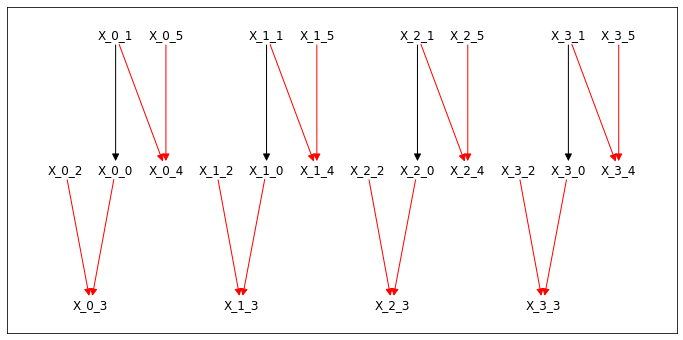

In [6]:
for v in xors:
    v.Obj = -1
m.learn(start='MIP model',abbrev=False)

So with a stronger preference for similarity all 4 BNs are the same.